<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/Mini_project_week4_d4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initial Data Exploration


##Load the dataset using Pandas. Check for null values and understand data types.



In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Load the dataset
df = pd.read_csv('/content/Apple Stock Prices (1981 to 2023).csv')



Date: Represents the date of the stock price.
Open: Represents the opening stock price on that date.
High: Represents the highest stock price on that date.
Low: Represents the lowest stock price on that date.
Close: Represents the closing stock price on that date.
Adj close: Represents the adjusted closing stock price on that date (taking into account corporate actions such as splits).
Volume: Represents the number of shares traded on that date.


In [34]:
# check data structure
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB
None
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


##Examine the time series properties of the data (e.g., frequency, trends).

In [35]:
# convert Data
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# set Data as Index
df = df.set_index('Date')


print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10608 entries, 1981-01-02 to 2023-01-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10608 non-null  float64
 1   High       10608 non-null  float64
 2   Low        10608 non-null  float64
 3   Close      10608 non-null  float64
 4   Adj Close  10608 non-null  float64
 5   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 580.1 KB
None
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1981-01-02  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1981-01-05  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
1981-01-06  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
1981-01-07  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
1981-01-08  0.135603  0.135603  0.135045  0.135045   0.105085  398

In [24]:
# check freq
freq = pd.infer_freq(df.index)
print("Freq of time", freq)


print(df.head(20))

Freq of time None
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1981-01-02  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1981-01-05  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
1981-01-06  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
1981-01-07  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
1981-01-08  0.135603  0.135603  0.135045  0.135045   0.105085  39827200
1981-01-09  0.142299  0.142857  0.142299  0.142299   0.110730  21504000
1981-01-12  0.142299  0.142299  0.141183  0.141183   0.109861  23699200
1981-01-13  0.136719  0.136719  0.136161  0.136161   0.105953  23049600
1981-01-14  0.136719  0.137277  0.136719  0.136719   0.106388  14291200
1981-01-15  0.139509  0.140625  0.139509  0.139509   0.108559  14067200
1981-01-16  0.138951  0.138951  0.138393  0.138393   0.107690  13395200
1981-01-19  0.146763  0.147321  0.146763  0.14

#Data Visualization

##Utilize Matplotlib to plot closing prices and traded volume over time

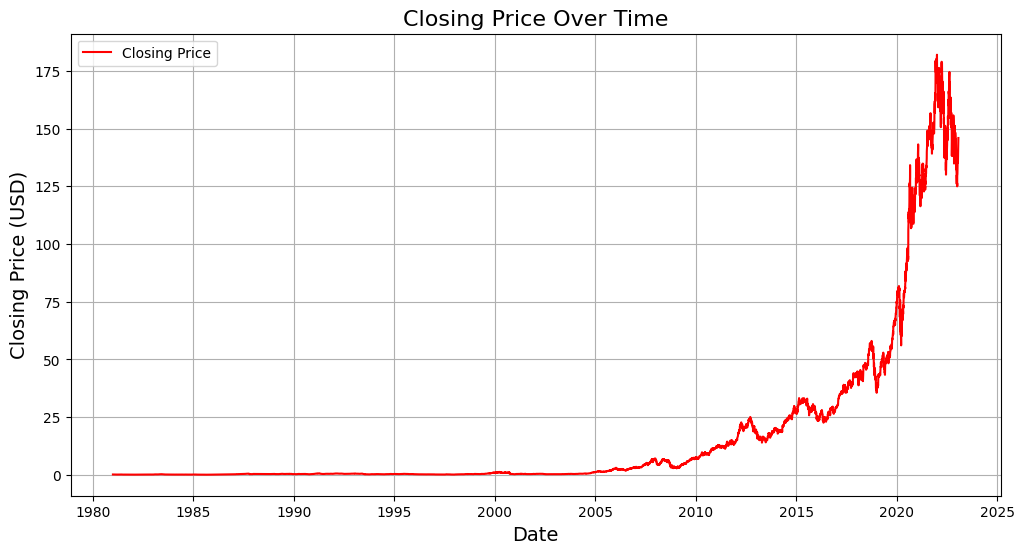

In [27]:
import matplotlib.pyplot as plt

# Create a plot for Closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", linestyle="-", color="r")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price (USD)", fontsize=14)
plt.title("Closing Price Over Time", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()



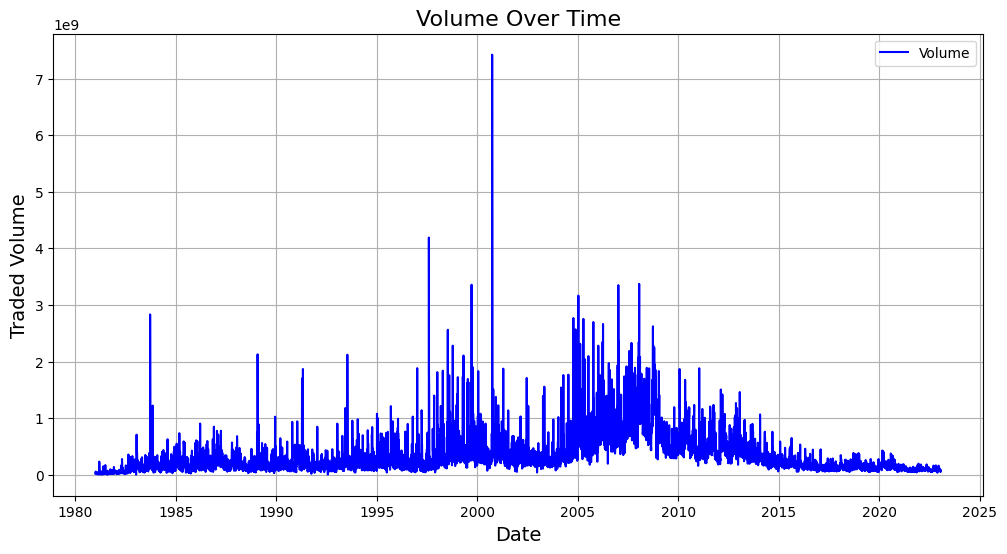

In [28]:
# Create a plot for Volume over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Volume"], label="Volume", linestyle="-", color="b")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Traded Volume", fontsize=14)
plt.title("Volume Over Time", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()



#Create a candlestick chart to depict high and low prices

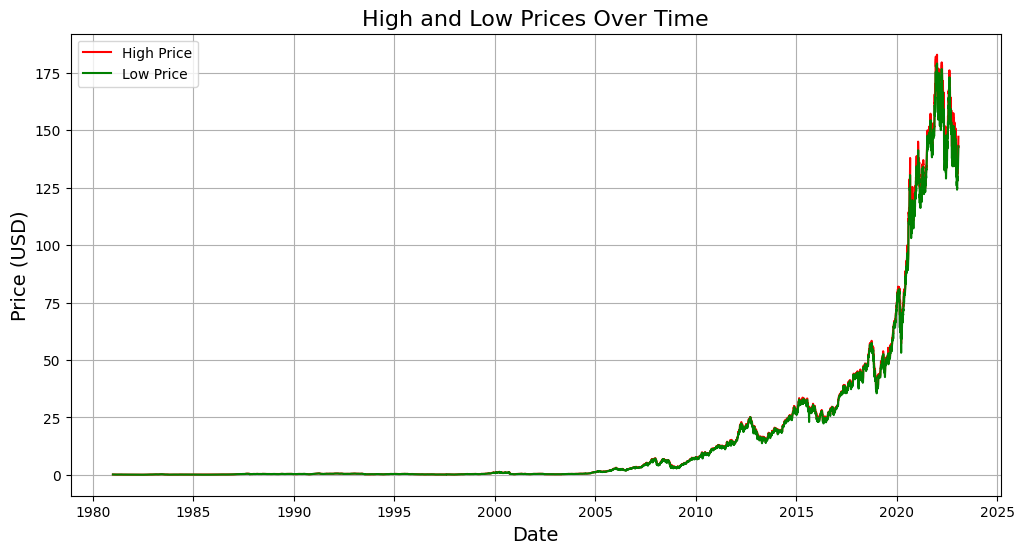

In [29]:

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["High"], label="High Price", linestyle="-", color="r")
plt.plot(df.index, df["Low"], label="Low Price", linestyle="-", color="g")

plt.xlabel("Date", fontsize=14)
plt.ylabel("Price (USD)", fontsize=14)
plt.title("High and Low Prices Over Time", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


#Statistical Analysis

##Compute summary statistics (mean, median, standard deviation) for key columns.

In [36]:
#  mean, median, and standard deviation
stats = df[['Close', 'Open', 'High', 'Low', 'Volume']].agg(['mean', 'median', 'std'])

# Display results
print(stats)


            Close       Open       High        Low        Volume
mean    16.697362  16.689173  16.879955  16.500822  3.275098e+08
median   0.487701   0.488839   0.495536   0.480446  2.145976e+08
std     35.473912  35.450519  35.882848  35.031289  3.378203e+08


##Analyze closing prices with a moving average.

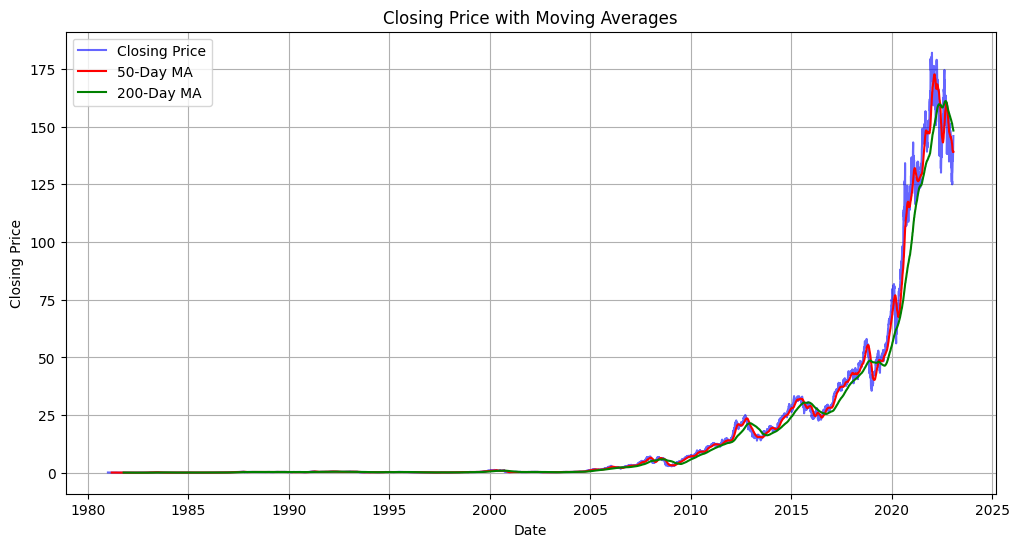

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute moving averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Plot closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df.index, df['MA_50'], label='50-Day MA', color='red')
plt.plot(df.index, df['MA_200'], label='200-Day MA', color='green')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


#Hypothesis Testing

##Execute a t-test

In [41]:
df[["Year"]]

,Year
Date,
1981-01-02,1981
1981-01-05,1981
1981-01-06,1981
1981-01-07,1981
1981-01-08,1981
...,...
2023-01-23,2023
2023-01-24,2023
2023-01-25,2023


In [50]:
df[["Close"]]

,Close
Date,
1981-01-02,0.154018
1981-01-05,0.150670
1981-01-06,0.143973
1981-01-07,0.137835
1981-01-08,0.135045
...,...
2023-01-23,141.110001
2023-01-24,142.529999
2023-01-25,141.860001


In [47]:
years = df['Year'].unique()
years

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int32)

In [54]:
# Group years into 10-year intervals
df['Year_Group'] = (df['Year'] // 10) * 10

# Get unique 10-year groups
year_groups = sorted(df['Year_Group'].unique())

In [55]:
for i in range(len(year_groups)):
    for j in range(i+1, len(year_groups)):
        group1 = year_groups[i]
        group2 = year_groups[j]

        # Get closing prices for each 10-year period
        prices_group1 = df[df['Year_Group'] == group1]['Close'].dropna()
        prices_group2 = df[df['Year_Group'] == group2]['Close'].dropna()

        # Perform the t-test
        t_stat, p_value = stats.ttest_ind(prices_group1, prices_group2, equal_var=False)

        # Print results
        print(f"T-test between {group1}-{group1+4} and {group2}-{group2+4}: "
              f"t-statistic = {t_stat:.4f}, p-value = {p_value:.4e}")

        alpha = 0.05
        if p_value < alpha:
            print("Significant difference in closing prices between these periods.")
        else:
            print("No significant difference in closing prices between these periods.")




T-test between 1980-1984 and 1990-1994: t-statistic = -39.4159, p-value = 1.2289e-294
Significant difference in closing prices between these periods.
T-test between 1980-1984 and 2000-2004: t-statistic = -46.8829, p-value = 0.0000e+00
Significant difference in closing prices between these periods.
T-test between 1980-1984 and 2010-2014: t-statistic = -97.8119, p-value = 0.0000e+00
Significant difference in closing prices between these periods.
T-test between 1980-1984 and 2020-2024: t-statistic = -119.8345, p-value = 0.0000e+00
Significant difference in closing prices between these periods.
T-test between 1990-1994 and 2000-2004: t-statistic = -43.3072, p-value = 3.2572e-307
Significant difference in closing prices between these periods.
T-test between 1990-1994 and 2010-2014: t-statistic = -97.2791, p-value = 0.0000e+00
Significant difference in closing prices between these periods.
T-test between 1990-1994 and 2020-2024: t-statistic = -119.6973, p-value = 0.0000e+00
Significant diffe

There is a significant and statistically significant increase in closing prices over the decades under consideration, with particularly strong growth after 2000.